In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import dexplot

Reading data

In [10]:
ratings = pd.read_csv('./goodbooks-10k-1.0/ratings.csv')
display(ratings.head(5))

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [11]:
ratings.shape

(5976479, 3)

In [12]:
len(ratings.user_id.unique())

53424

There are almost 6 million od ratings - it is too much to be processed. To handle this situation I will remove ratings of 43000 random users.

In [13]:
random.seed(6)

In [14]:
users_to_remove = random.sample(list(ratings.user_id.unique()), 43000)

In [15]:
ratings = ratings[~ratings.user_id.isin(users_to_remove)]

In [16]:
ratings.shape

(1170159, 3)

Check if there are any NaNs in data

In [17]:
ratings.isna().sum()

user_id    0
book_id    0
rating     0
dtype: int64

Check if there is any users who give two ratings to the same book.

In [18]:
ratings.duplicated(['user_id','book_id']).sum()

0

In [19]:
ratings.rating.describe()

count    1.170159e+06
mean     3.920670e+00
std      9.864549e-01
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [20]:
print(f'Total number of users is {len(ratings.user_id.unique())}.')
print(f'Total number of rated books is {len(ratings.book_id.unique())}.')
print(f'Total number of ratings is {len(ratings)}.')

Total number of users is 10424.
Total number of rated books is 10000.
Total number of ratings is 1170159.


findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


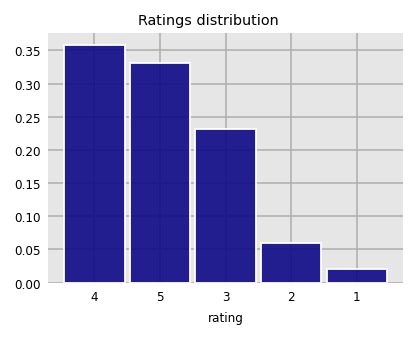

In [21]:
dexplot.count(val='rating', data=ratings, normalize= True, title='Ratings distribution', cmap='plasma')

The most common rating is 4. Now we have to check if there are any books with really few ratings or users who gave very few ratings.

In [22]:
def check_ratings(data, col_name):
    data_grouped = data.groupby(col_name)['rating'].count()
    title = 'Number of ratings per '+ str(col_name[:-3])
    display(dexplot.hist(val='rating',data=data_grouped, title=title, cmap='plasma'))
    print('Statistics for dataframe grouped by '+ str(col_name) +':')
    print(data_grouped.describe())

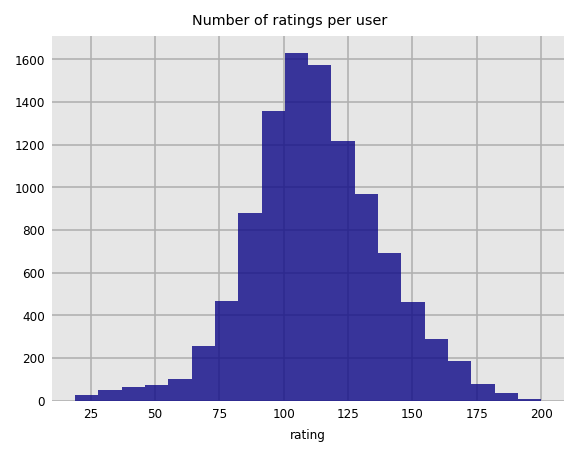

Statistics for dataframe grouped by user_id:
count    10424.000000
mean       112.256236
std         25.760423
min         19.000000
25%         96.000000
50%        111.000000
75%        128.000000
max        200.000000
Name: rating, dtype: float64


In [23]:
check_ratings(ratings,'user_id')

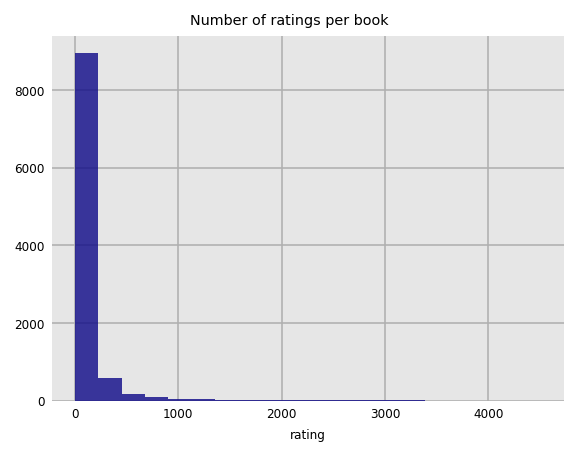

Statistics for dataframe grouped by book_id:
count    10000.000000
mean       117.015900
std        249.568585
min          3.000000
25%         30.000000
50%         48.000000
75%         99.000000
max       4512.000000
Name: rating, dtype: float64


In [24]:
check_ratings(ratings,'book_id')

For the prediction I will use the library Surprise.

In [25]:
from surprise import Reader, Dataset
from surprise.model_selection import train_test_split, GridSearchCV
from surprise.prediction_algorithms import KNNBasic,KNNBaseline,KNNWithZScore,KNNWithMeans
from surprise import accuracy

In [26]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings, reader)

In [27]:
X_train, X_test = train_test_split(data, test_size=0.1)

In [28]:
model_list = [KNNBasic(),KNNBaseline(),KNNWithZScore(),KNNWithMeans()]

In [29]:
for model in model_list:
    model.fit(X_train)
    print(str(model))
    test_pred = model.test(X_test)
    print(accuracy.rmse(test_pred))

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8762
0.8762290814972862
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8377
0.8376560208051538
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8427
0.8426544767306272
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8436
0.8435897101282609
